In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
from scipy import stats as spstats
from scipy.stats import norm

from interpml import config

%matplotlib inline

# Import Data from UCI

### Load Data

In [2]:
# Loads the car dataset
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)

In [3]:
# Inspect the first 5 entries in dataframe
df.columns = ['buying price', 'maintanence price', 'doors', 'capacity (persons)', 'luggage boot size', 'estimated safety', 'class']
df.head()

,buying price,maintanence price,doors,capacity (persons),luggage boot size,estimated safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [4]:
df.shape

(1728, 7)

In [5]:
# Check for the unique values in each column
df['buying price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [6]:
df['maintanence price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [7]:
df['luggage boot size'].unique()

array(['small', 'med', 'big'], dtype=object)

In [8]:
df['estimated safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [9]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [10]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [11]:
df['capacity (persons)'].unique()

array(['2', '4', 'more'], dtype=object)

---

# Fit Random Forest Model

In [12]:
# Create an instance of the sklearn RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=500, oob_score=True)

#### Make training and testing data from data set

In [13]:
# Convert text values to numerical values
convert_dict = {'small':0, 'low':0, 'med':1, 'high':2, 'big':2, 'vhigh':3}
converted_df = df.copy()
converted_df['buying price'] = df['buying price'].apply(lambda s: convert_dict[s])
converted_df['maintanence price'] = df['maintanence price'].apply(lambda s: convert_dict[s])
converted_df['luggage boot size'] = df['luggage boot size'].apply(lambda s: convert_dict[s])
converted_df['estimated safety'] = df['estimated safety'].apply(lambda s: convert_dict[s])

In [14]:
converted_df['doors'] = df['doors'].apply(lambda s: 5 if s == '5more' else s)
converted_df['capacity (persons)'] = df['capacity (persons)'].apply(lambda s: 5 if s == 'more' else s)

In [15]:
converted_df.head()

,buying price,maintanence price,doors,capacity (persons),luggage boot size,estimated safety,class
0,3,3,2,2,0,0,unacc
1,3,3,2,2,0,1,unacc
2,3,3,2,2,0,2,unacc
3,3,3,2,2,1,0,unacc
4,3,3,2,2,1,1,unacc


In [16]:
# Convert class labels to numerical values
le = LabelEncoder()
le.fit(converted_df['class'].unique())
converted_df['class'] = le.transform(converted_df['class'].values)
converted_df.head()

,buying price,maintanence price,doors,capacity (persons),luggage boot size,estimated safety,class
0,3,3,2,2,0,0,2
1,3,3,2,2,0,1,2
2,3,3,2,2,0,2,2
3,3,3,2,2,1,0,2
4,3,3,2,2,1,1,2


In [17]:
# Inspect the label encoder's class labels
le.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [18]:
# Extract values from dataframe
X = converted_df[['buying price', 'maintanence price', 'doors', 'capacity (persons)', 'luggage boot size', 'estimated safety']].astype(float).values
Y = converted_df['class'].astype(int).values

In [19]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Fit random forest on training data

In [20]:
# Fit random forest model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

#### Evaluate the fit

In [21]:
# Print training accuracy and confusion matrix
y_train_pred = rf.predict(X_train)
print('Training accuracy:', rf.score(X_train, y_train))
print('Training confusion matrix:\n', confusion_matrix(y_train, y_train_pred))

Training accuracy: 1.0
Training confusion matrix:
 [[305   0   0   0]
 [  0  52   0   0]
 [  0   0 970   0]
 [  0   0   0  55]]


In [22]:
# Print training accuracy and confusion matrix
y_test_pred = rf.predict(X_test)
print('Training accuracy:', rf.score(X_test, y_test))
print('Training confusion matrix:\n', confusion_matrix(y_test, y_test_pred))

Training accuracy: 0.976878612716763
Training confusion matrix:
 [[ 76   2   0   1]
 [  1  15   0   1]
 [  2   0 238   0]
 [  1   0   0   9]]


---
# Visualizations

In [23]:
# Extract feature importance from the random forest
feature_val = rf.feature_importances_
feature_std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
values = np.vstack((feature_val, feature_std)).T

feature_ranking = pd.DataFrame(values, columns=['feature importance', 'importance std'], index=['buying price', 'maintanence price', 'doors', 'capacity (persons)', 'luggage boot size', 'estimated safety'])
feature_ranking = feature_ranking.sort_values(by='feature importance', ascending=False)

#### Print Graph Data for Giulia

In [24]:
print(feature_ranking)

                    feature importance  importance std
estimated safety              0.308098        0.073846
capacity (persons)            0.254996        0.059438
buying price                  0.147882        0.073370
maintanence price             0.136933        0.061290
luggage boot size             0.093071        0.040980
doors                         0.059020        0.015405


In [25]:
feature_ranking.to_csv('feature_ranking.csv')
converted_df.to_csv('converted_df.csv')

#### Visualize feature importance

In [26]:
feature_std.shape

(6,)

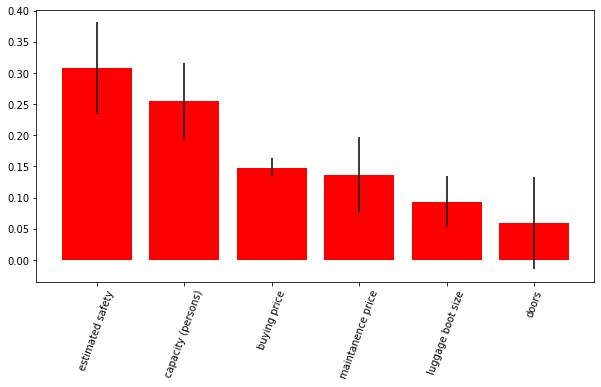

In [27]:
# Visualize bar graph of feature importance
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(np.arange(len(feature_ranking)), feature_ranking.values[:, 0], tick_label=feature_ranking.index, color='red', yerr=feature_std)
ax.set_xticklabels(labels=feature_ranking.index, rotation=70, ha='center')
plt.show()

In [28]:
# Scatter plots
import seaborn as sns

sns.set()

In [29]:
np.unique(y_test_pred)

array([0, 1, 2, 3])

In [30]:
np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [31]:
def acc_plot(y_true, y_pred, group_var, group_labs, class_labs, barwidth=.2):
    '''Side-by-side bar plots of precision, recall accuracy, grouped by `group_var`.
    '''
    groups = np.unique(group_var)
    classes = np.unique(y_true)
    scores = []
    
    for group in groups:
        y_true_group = y_true[group_var == group]
        y_pred_group = y_pred[group_var == group]
        
        class_scores = []
        for cls in classes:
            class_scores.append(accuracy(y_true_group, y_pred_group))
        scores.append(class_scores)
    
    scores = np.array(scores)
    
    plt.figure(figsize=(10, 5))
    for i, cls in enumerate(class_labs):
        plt.bar(groups + barwidth * i, scores[:, i], label=cls, width=barwidth)
    plt.xticks(ticks=groups + barwidth, labels=group_labs)
    plt.legend(title="Car quality")
    plt.ylabel("Accuracy")
    plt.xlim(groups.min(), groups.max() + 1)

    
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

0


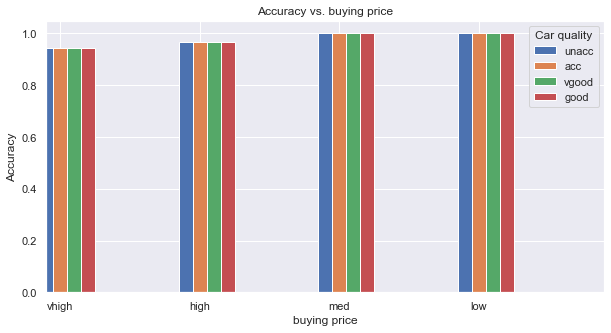

1


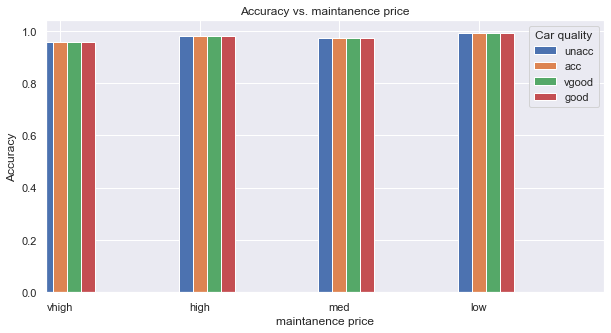

2


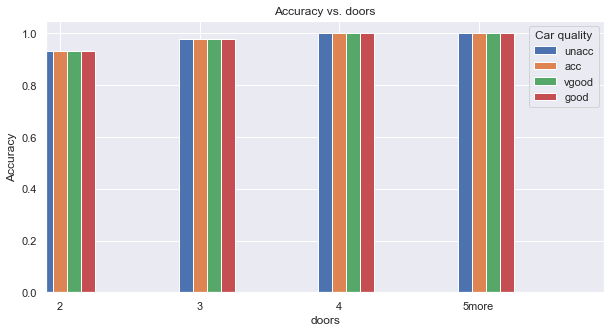

3


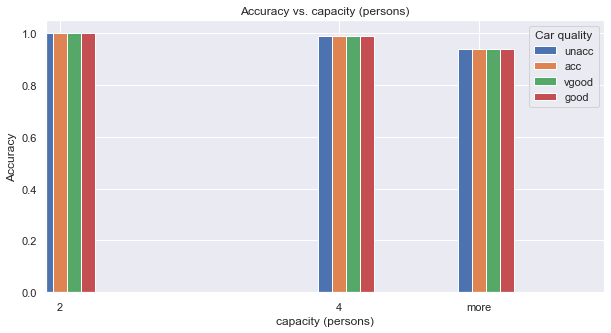

4


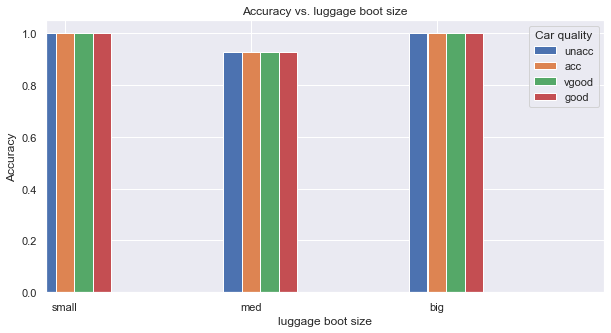

5


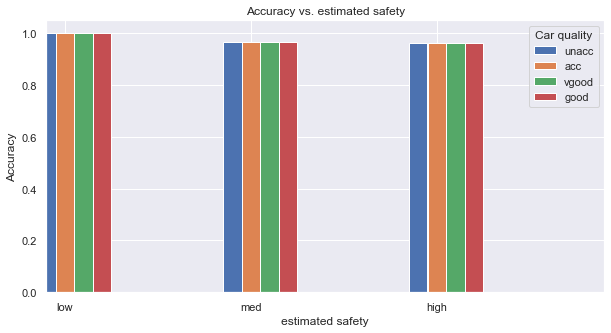

In [32]:
def plot_acc_vs_group(group_varname):
    class_labs = df['class'].unique()
    group_labs = df[group_varname].unique()
    group_var_idx = np.argwhere(df.columns.values == group_varname)[0, 0]
    print(group_var_idx)
    group_var = X_test[:, group_var_idx]

    acc_plot(y_test, y_test_pred, group_var, group_labs, class_labs, barwidth=.1)
    plt.title(f"Accuracy vs. {group_varname}")
    plt.xlabel(group_varname);

    
for group_varname in df.columns:
    if group_varname == 'class':
        continue
    plot_acc_vs_group(group_varname)
    plt.show()

### Using `scikit-plot`

In [33]:
import scikitplot as skplt

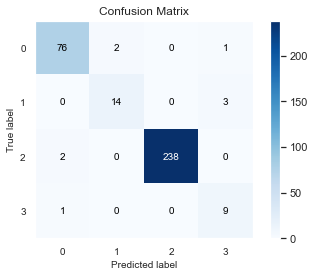

In [107]:
# Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred);

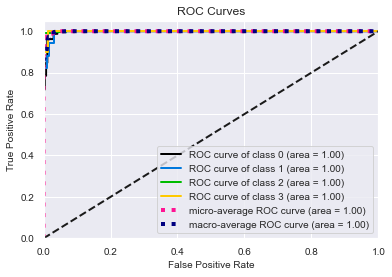

In [108]:
y_test_proba = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_test_proba)

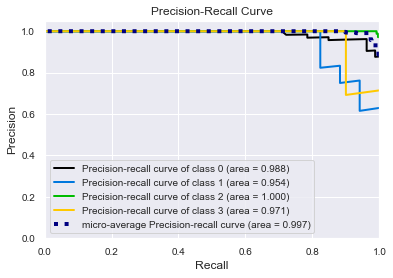

In [111]:
skplt.metrics.plot_precision_recall(y_test, y_test_proba)

### Plots of data

In [113]:
df

,buying price,maintanence price,doors,capacity (persons),luggage boot size,estimated safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [122]:
df_grouped = df.groupby(['class', 'maintanence price']).size().reset_index()
df_grouped = df_grouped.rename(columns={0:'count'})

In [123]:
df_grouped

,class,maintanence price,count
0,acc,high,105
1,acc,low,92
2,acc,med,115
3,acc,vhigh,72
4,good,low,46
5,good,med,23
6,unacc,high,314
7,unacc,low,268
8,unacc,med,268
9,unacc,vhigh,360


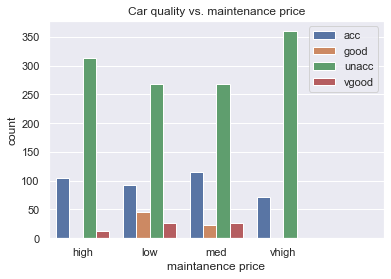

In [137]:
# Bars
# x-axis: group
# y-axis: pct
# color: class
sns.barplot(x='maintanence price', y='count', hue='class', data=df_grouped)
plt.xlim(-.5, 4.5)
plt.legend(loc='upper right')
plt.title("Car quality vs. maintenance price");

In [143]:
# Categorical heatmap
df_grouped = (df
              .assign(class_enc=le.transform(df['class']))
              .groupby(['maintanence price', 'estimated safety'])
              .apply(lambda x: x['class_enc'].mean())
              .reset_index()
              .rename(columns={0: 'mean_class'}))

In [161]:
levels = ['low', 'med', 'high', 'vhigh']
grid_data = np.zeros((len(levels), len(levels)))
for i, l1 in enumerate(levels):
    for j, l2 in enumerate(levels):
        row = df_grouped[np.logical_and(df_grouped['maintanence price'] == l1, df_grouped['estimated safety'] == l2)]
        if len(row) == 0:
            continue
        grid_data[i, j] = row['mean_class']


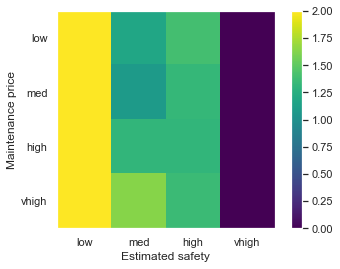

In [174]:
plt.imshow(grid_data, cmap='viridis')
plt.grid(False)
plt.xticks(ticks=np.arange(len(levels)), labels=levels)
plt.yticks(ticks=np.arange(len(levels)), labels=levels)
plt.colorbar()
plt.ylabel("Maintenance price")
plt.xlabel("Estimated safety");

## New viz's 

### Most common predicted class for cars like this one

In [38]:
colnames = converted_df.columns[:-1].tolist()

In [45]:
idx = 6

In [46]:
feats = X_test[idx]

In [50]:
means = []
for i, feat in enumerate(feats):
    featmean = y_test_pred[X_test[:, i] == feat].mean()
    means.append(featmean)

In [52]:
means

[1.5662650602409638,
 1.676056338028169,
 1.4631578947368422,
 2.0,
 1.5726495726495726,
 2.0]

In [53]:
feat_means = pd.DataFrame({
    'feature': colnames,
    'value': means
})

In [54]:
feat_means

,feature,value
0,buying price,1.566265
1,maintanence price,1.676056
2,doors,1.463158
3,capacity (persons),2.000000
4,luggage boot size,1.572650
5,estimated safety,2.000000


In [56]:
feat_means.to_csv(config.data / 'feature_means.csv', index=False)